11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2632 - accuracy: 0.9239 - val_loss: 0.1401 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1149 - accuracy: 0.9667 - val_loss: 0.0922 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9762 - val_loss: 0.0919 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0797 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 0.0745 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - l

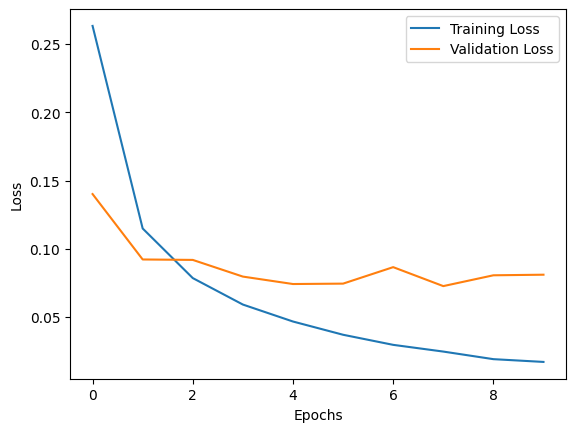

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9763
Test Loss: 0.0810457244515419, Test Accuracy: 0.9763000011444092
313/313 [==============================] - 1s 2ms/step


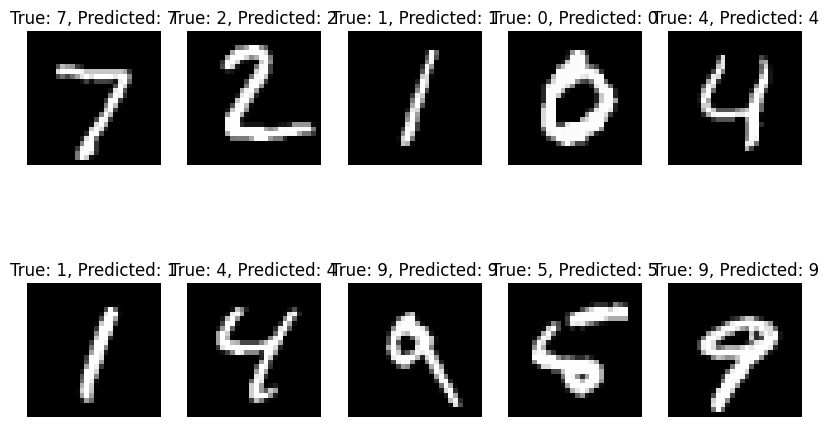

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model architecture
inputs = Input(shape=(28, 28))
flatten = Flatten()(inputs)
dense1 = Dense(128, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(dense1)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Generate predictions on the test set
predictions = model.predict(X_test)

# Plot some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'True: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()


In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data and reshape it to fit CNN input shape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define and compile the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to integers
y_test_int = np.argmax(y_test, axis=1)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test_int, y_pred)
precision = precision_score(y_test_int, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)


Epoch 1/10
1875/1875 [==============================] - 59s 30ms/step - loss: 0.1970 - accuracy: 0.9392 - val_loss: 0.0755 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0499 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0431 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0451 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0381 -

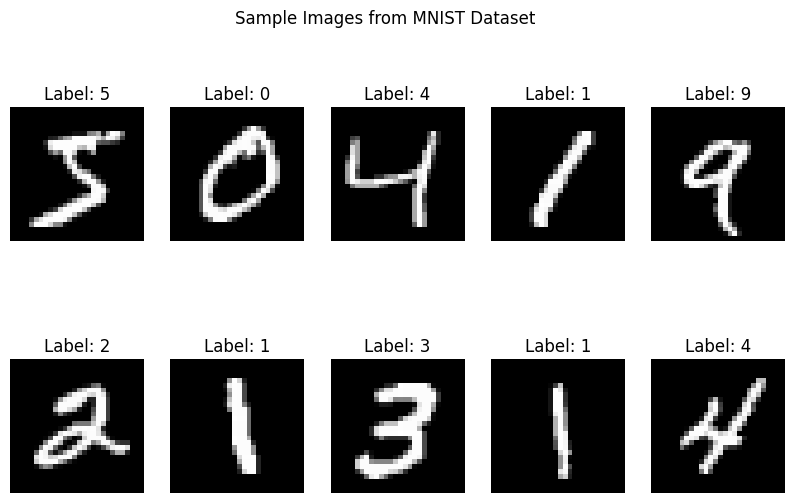

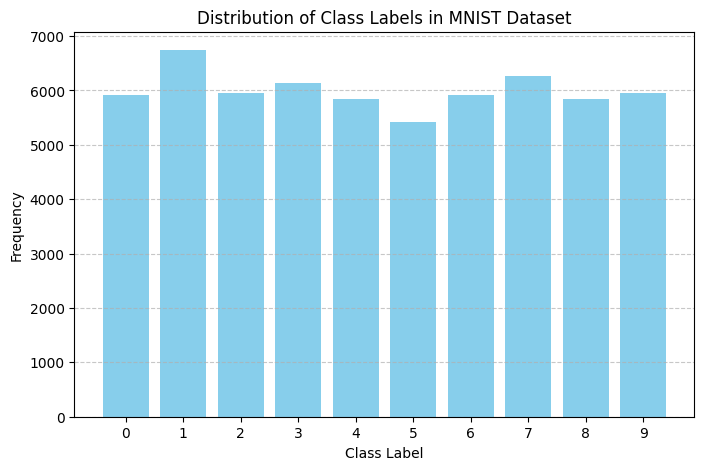

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize some sample images
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle('Sample Images from MNIST Dataset')
plt.show()

# Plot distribution of class labels
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=range(11), align='left', rwidth=0.8, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels in MNIST Dataset')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


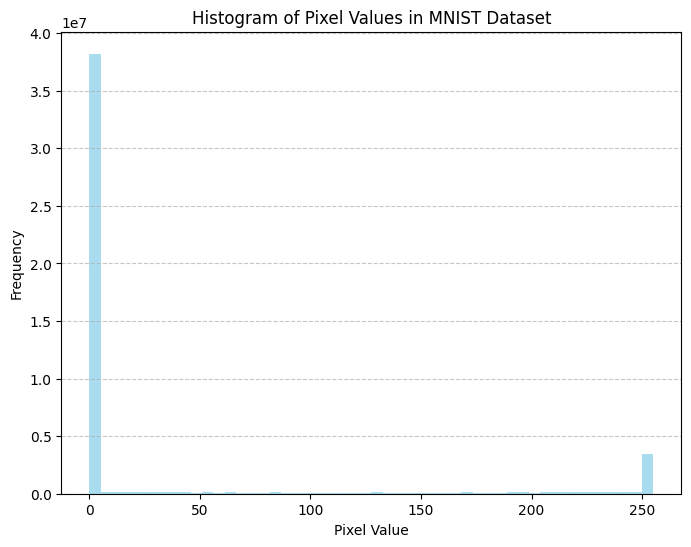

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images (convert 28x28 images to 1D arrays of length 784)
X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

# Plot histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(X_train_flattened.flatten(), bins=50, color='skyblue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values in MNIST Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


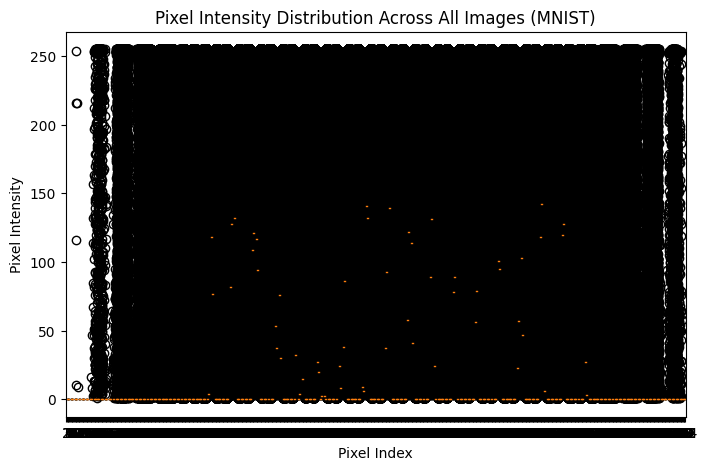

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Plot boxplot of pixel intensity distribution
plt.figure(figsize=(8, 5))
plt.boxplot(X_train_flattened)
plt.title('Pixel Intensity Distribution Across All Images (MNIST)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Intensity')
plt.show()


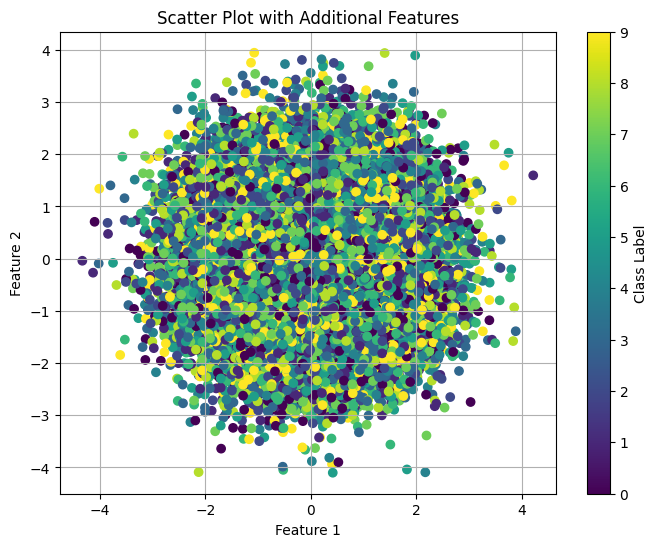

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Extract additional features (for demonstration purposes)
# Here, we generate random values as placeholders for extracted features
additional_features = np.random.randn(len(X_train), 2)

# Create scatter plot using the additional features
plt.figure(figsize=(8, 6))
plt.scatter(additional_features[:, 0], additional_features[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Additional Features')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()


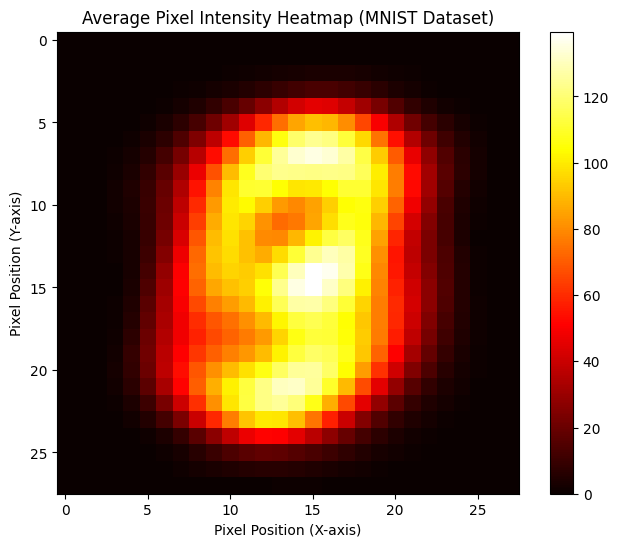

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Calculate average pixel intensity across all images
avg_intensity = np.mean(X_train, axis=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(avg_intensity, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Average Pixel Intensity Heatmap (MNIST Dataset)')
plt.xlabel('Pixel Position (X-axis)')
plt.ylabel('Pixel Position (Y-axis)')
plt.show()


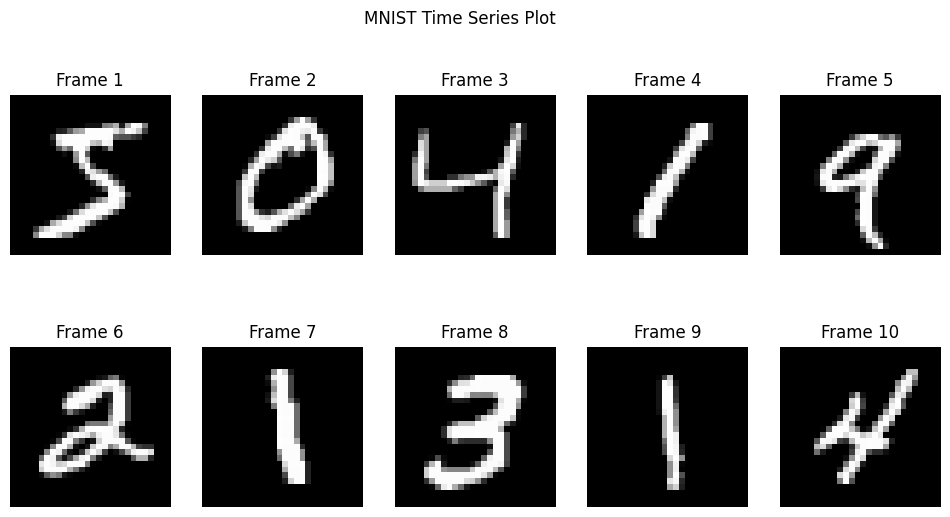

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Assuming we have a sequence of images representing a digit over time
# For demonstration, let's consider the first 10 images from the training set
# Each image represents a frame in the time series
time_series_data = X_train[:10]

# Plot time series data
plt.figure(figsize=(12, 6))
for i, image in enumerate(time_series_data):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Frame {i+1}")
    plt.axis('off')
plt.suptitle('MNIST Time Series Plot')
plt.show()
